In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2')

In [90]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # or any {'0', '1', '2'}

In [5]:
df=pd.read_csv('probe.csv')
df.head()

,t,x,y,z,prank,etype,uidx,eidx,rho,u,v,w,p
0,3.211295e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.279629e-11,-9.923974e-13,89769.0
1,8.815134e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.869202e-11,-1.122913e-11,89769.0
2,1.647040e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,5.807815e-11,-2.223040e-11,89769.0
3,2.668280e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.084827e-11,-3.707606e-11,89769.0
4,4.028759e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.188746e-11,-5.721957e-11,89769.0


In [6]:
df.dtypes

t        float64
x        float64
y        float64
z        float64
prank      int64
etype     object
uidx       int64
eidx       int64
rho      float64
u        float64
v        float64
w        float64
p        float64
dtype: object

Text(0, 0.5, 'u')

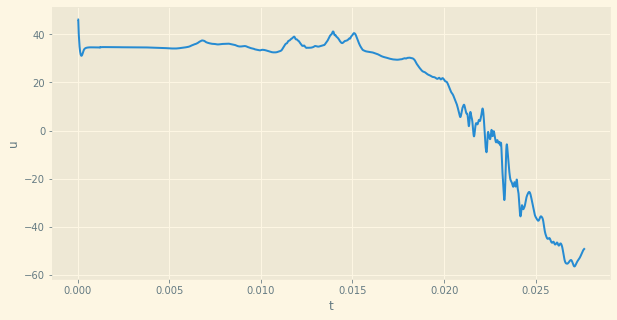

In [96]:
plt.figure(figsize=(10,5))
plt.plot(df.t,df.u)
plt.xlabel('t')
plt.ylabel('u')

Text(0, 0.5, 'v')

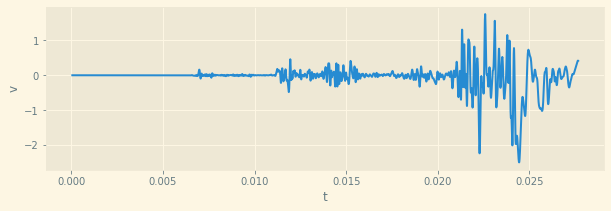

In [97]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.v)
plt.xlabel('t')
plt.ylabel('v')

Text(0, 0.5, 'w')

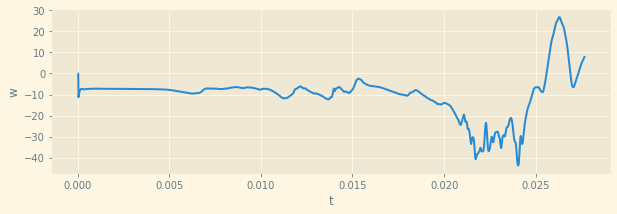

In [98]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.w)
plt.xlabel('t')
plt.ylabel('w')

Text(0, 0.5, 'p')

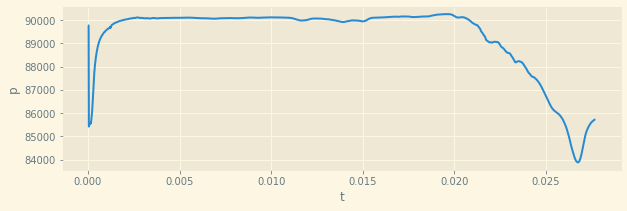

In [99]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.p)
plt.xlabel('t')
plt.ylabel('p')

Text(0, 0.5, '$\\rho$')

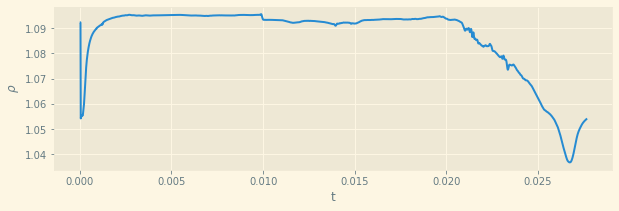

In [100]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.rho)
plt.xlabel('t')
plt.ylabel(r'$\rho$')

In [12]:
df.shape

(3802, 13)

## Univariate prediction
Predict one of the variables from its own time series.

In [13]:
# take 10 time steps and try to predict the 11th time step output
def df_to_x_y(df,window_size=10):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        inpt = [[u] for u in df_as_np[i:i+window_size]]
        X.append(inpt)
        outpt = df_as_np[i+window_size]
        y.append(outpt)
    return np.array(X),np.array(y)

In [14]:
ws=10
vin,vout = df_to_x_y(df['v'],ws)

In [15]:
vin.shape

(3792, 10, 1)

In [16]:
x_train,y_train = vin[:3000],vout[:3000]
x_val,y_val = vin[3000:3350],vout[3000:3350]
x_test,y_test = vin[3350:],vout[3350:]

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [17]:
#uv : univariate
uvmodel = Sequential()
uvmodel.add(InputLayer((ws,1)))
uvmodel.add(LSTM(64))
uvmodel.add(Dense(16,'relu'))
uvmodel.add(Dense(1,'linear'))

uvmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17,953
Trainable params: 17,953
Non-trainable params: 0
_________________________________________________________________


In [18]:
cpuv = ModelCheckpoint('model1/',save_best_only=True)
uvmodel.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [19]:
uvmodel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[cpuv])

Epoch 1/50
93/94 [============================>.] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1358

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 5s 38ms/step - loss: 0.0185 - root_mean_squared_error: 0.1359 - val_loss: 0.8423 - val_root_mean_squared_error: 0.9178
Epoch 2/50
81/94 [========================>.....] - ETA: 0s - loss: 0.0150 - root_mean_squared_error: 0.1224

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 0.0146 - root_mean_squared_error: 0.1208 - val_loss: 0.6911 - val_root_mean_squared_error: 0.8313
Epoch 3/50
79/94 [========================>.....] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.1101

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.5965 - val_root_mean_squared_error: 0.7723
Epoch 4/50
84/94 [=========================>....] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.0998

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.0103 - root_mean_squared_error: 0.1013 - val_loss: 0.5164 - val_root_mean_squared_error: 0.7186
Epoch 5/50
94/94 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.0915

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 0.0084 - root_mean_squared_error: 0.0915 - val_loss: 0.4347 - val_root_mean_squared_error: 0.6593
Epoch 6/50
85/94 [==========================>...] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.0837

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.0067 - root_mean_squared_error: 0.0816 - val_loss: 0.3610 - val_root_mean_squared_error: 0.6008
Epoch 7/50
84/94 [=========================>....] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0739

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.3240 - val_root_mean_squared_error: 0.5692
Epoch 8/50
89/94 [===========================>..] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0668

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 0.0045 - root_mean_squared_error: 0.0672 - val_loss: 0.2944 - val_root_mean_squared_error: 0.5426
Epoch 9/50
91/94 [============================>.] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0641

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.0040 - root_mean_squared_error: 0.0635 - val_loss: 0.2591 - val_root_mean_squared_error: 0.5090
Epoch 10/50
91/94 [============================>.] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0614

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.2249 - val_root_mean_squared_error: 0.4742
Epoch 11/50
94/94 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0589

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 0.2198 - val_root_mean_squared_error: 0.4689
Epoch 12/50
88/94 [===========================>..] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0574

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.2191 - val_root_mean_squared_error: 0.4681
Epoch 13/50
92/94 [============================>.] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0556

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.2062 - val_root_mean_squared_error: 0.4541
Epoch 14/50
91/94 [============================>.] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0541

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.1852 - val_root_mean_squared_error: 0.4303
Epoch 15/50
94/94 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.1890 - val_root_mean_squared_error: 0.4347
Epoch 16/50
94/94 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0510

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 0.0026 - root_mean_squared_error: 0.0510 - val_loss: 0.1492 - val_root_mean_squared_error: 0.3862
Epoch 17/50
90/94 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0495

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 0.0024 - root_mean_squared_error: 0.0493 - val_loss: 0.1438 - val_root_mean_squared_error: 0.3792
Epoch 18/50
90/94 [===========================>..] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0476

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 0.0023 - root_mean_squared_error: 0.0478 - val_loss: 0.1297 - val_root_mean_squared_error: 0.3601
Epoch 19/50
94/94 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460 - val_loss: 0.1416 - val_root_mean_squared_error: 0.3763
Epoch 20/50
91/94 [============================>.] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0445

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.1200 - val_root_mean_squared_error: 0.3464
Epoch 21/50
90/94 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0430

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.1085 - val_root_mean_squared_error: 0.3294
Epoch 22/50
93/94 [============================>.] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0411

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0986 - val_root_mean_squared_error: 0.3140
Epoch 23/50
82/94 [=========================>....] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0366

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 38ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0877 - val_root_mean_squared_error: 0.2961
Epoch 24/50
89/94 [===========================>..] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0374

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.0014 - root_mean_squared_error: 0.0371 - val_loss: 0.0721 - val_root_mean_squared_error: 0.2686
Epoch 25/50
88/94 [===========================>..] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0351

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 0.0560 - val_root_mean_squared_error: 0.2367
Epoch 26/50
91/94 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0329    

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0523 - val_root_mean_squared_error: 0.2286
Epoch 27/50
86/94 [==========================>...] - ETA: 0s - loss: 9.0744e-04 - root_mean_squared_error: 0.0301

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 8.9576e-04 - root_mean_squared_error: 0.0299 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1993
Epoch 28/50
88/94 [===========================>..] - ETA: 0s - loss: 7.3368e-04 - root_mean_squared_error: 0.0271

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 7.4251e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1914
Epoch 29/50
87/94 [==========================>...] - ETA: 0s - loss: 6.0988e-04 - root_mean_squared_error: 0.0247

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 6.1634e-04 - root_mean_squared_error: 0.0248 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1685
Epoch 30/50
90/94 [===========================>..] - ETA: 0s - loss: 5.5532e-04 - root_mean_squared_error: 0.0236

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 5.5022e-04 - root_mean_squared_error: 0.0235 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1561
Epoch 31/50
92/94 [============================>.] - ETA: 0s - loss: 4.6536e-04 - root_mean_squared_error: 0.0216

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 30ms/step - loss: 4.6526e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1456
Epoch 32/50
87/94 [==========================>...] - ETA: 0s - loss: 4.2818e-04 - root_mean_squared_error: 0.0207

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 4.3521e-04 - root_mean_squared_error: 0.0209 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1255
Epoch 33/50
94/94 [==============================] - 0s 4ms/step - loss: 4.1624e-04 - root_mean_squared_error: 0.0204 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1419
Epoch 34/50
94/94 [==============================] - 0s 4ms/step - loss: 3.9979e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1360
Epoch 35/50
94/94 [==============================] - 0s 4ms/step - loss: 3.7998e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1325
Epoch 36/50
94/94 [==============================] - 0s 4ms/step - loss: 3.7117e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1286
Epoch 37/50
94/94 [==============================] - 0s 4ms/step - loss: 3.9405e-04 - root_mean_squared_error: 0.0199 - val_loss: 0.0176

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 3.6771e-04 - root_mean_squared_error: 0.0192 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1175
Epoch 39/50
94/94 [==============================] - 0s 4ms/step - loss: 3.4331e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1338
Epoch 40/50
94/94 [==============================] - 0s 4ms/step - loss: 3.4858e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1407
Epoch 41/50
94/94 [==============================] - 0s 4ms/step - loss: 3.5988e-04 - root_mean_squared_error: 0.0190 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1229
Epoch 42/50
91/94 [============================>.] - ETA: 0s - loss: 3.5465e-04 - root_mean_squared_error: 0.0188

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 3.5744e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1126
Epoch 43/50
94/94 [==============================] - 0s 5ms/step - loss: 3.2565e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1342
Epoch 44/50
94/94 [==============================] - 0s 4ms/step - loss: 3.1821e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157
Epoch 45/50
80/94 [========================>.....] - ETA: 0s - loss: 2.8506e-04 - root_mean_squared_error: 0.0169

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 30ms/step - loss: 3.0561e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063
Epoch 46/50
94/94 [==============================] - 0s 4ms/step - loss: 3.0088e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1071
Epoch 47/50
94/94 [==============================] - 0s 4ms/step - loss: 2.9128e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 48/50
94/94 [==============================] - 0s 4ms/step - loss: 2.8906e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1166
Epoch 49/50
80/94 [========================>.....] - ETA: 0s - loss: 2.8723e-04 - root_mean_squared_error: 0.0169

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 33ms/step - loss: 2.7890e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1008
Epoch 50/50
94/94 [==============================] - 0s 5ms/step - loss: 2.8096e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1080


In [20]:
from tensorflow.keras.models import load_model
uv_model = load_model('model1/')

In [21]:
train=uv_model.predict(x_train)#.flatten()
val=uv_model.predict(x_val)#.flatten()
test=uv_model.predict(x_test)#.flatten()

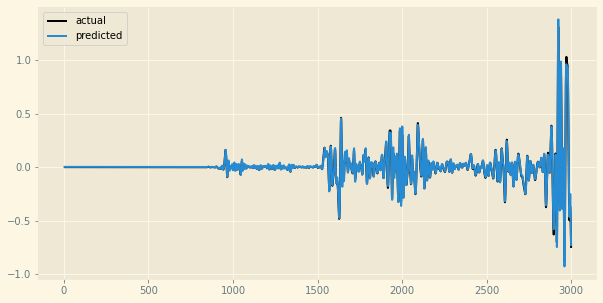

In [22]:
plt.figure(figsize=(10,5))
plt.plot(y_train,'k',label='actual')
plt.plot(train,label='predicted')
plt.legend()

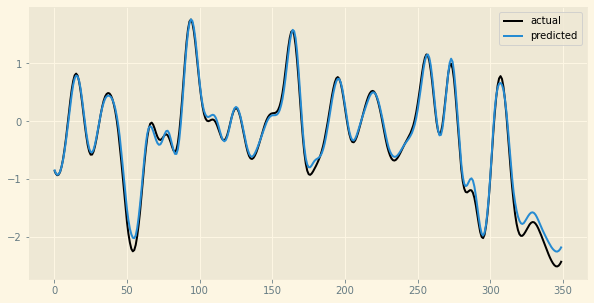

In [23]:
plt.figure(figsize=(10,5))
plt.plot(y_val,'k',label='actual')
plt.plot(val,label='predicted')
plt.legend()

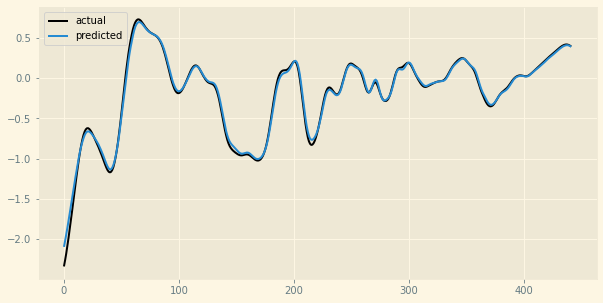

In [24]:
plt.figure(figsize=(10,5))
plt.plot(y_test,'k',label='actual')
plt.plot(test,label='predicted')
plt.legend()

While trying to predict _u_, it is noticed that the model fails to predict negative values of _u_. This could be due to the fact that much of the training set has positive values of _u_ and the activation function. There are two ways to solve this issue. The first one is to increase the training set size to account for negative values also. But that is not a viable option as the dataset itself is for a short window. The other option is to apply a relevant scaling to keep all values positive. 

### Scaled velocity

In [25]:
# min-max scaling
df['V_scaled']=(df.v-df.v.min())/(df.v.max()-df.v.min())
ws=10
inU,outU = df_to_x_y(df['V_scaled'],ws)

In [26]:
u_train,y_train = inU[:3000],outU[:3000]
u_val,y_val = inU[3000:3350],outU[3000:3350]
u_test,y_test = inU[3350:],outU[3350:]

_Caution_ : here we fit the same model to the scaled data. Ideally, a new model must be used to fit the new data.

In [27]:
uvmodel.fit(u_train, y_train, validation_data=(u_val, y_val), epochs=50, callbacks=[cpuv])

Epoch 1/50
92/94 [============================>.] - ETA: 0s - loss: 5.7665e-05 - root_mean_squared_error: 0.0076

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 5.6957e-05 - root_mean_squared_error: 0.0075 - val_loss: 3.3870e-04 - val_root_mean_squared_error: 0.0184
Epoch 2/50
87/94 [==========================>...] - ETA: 0s - loss: 1.7892e-05 - root_mean_squared_error: 0.0042

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 1.7248e-05 - root_mean_squared_error: 0.0042 - val_loss: 3.3615e-04 - val_root_mean_squared_error: 0.0183
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 1.7458e-05 - root_mean_squared_error: 0.0042 - val_loss: 3.5628e-04 - val_root_mean_squared_error: 0.0189
Epoch 4/50
94/94 [==============================] - 0s 4ms/step - loss: 1.8212e-05 - root_mean_squared_error: 0.0043 - val_loss: 3.9921e-04 - val_root_mean_squared_error: 0.0200
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 1.7675e-05 - root_mean_squared_error: 0.0042 - val_loss: 3.7789e-04 - val_root_mean_squared_error: 0.0194
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 1.6269e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.6831e-04 - val_root_mean_squared_error: 0.0192
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 1.6659e-05 - root_mean_squared_error: 0.0041 - v

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 1.5974e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.3206e-04 - val_root_mean_squared_error: 0.0182
Epoch 26/50
94/94 [==============================] - 0s 4ms/step - loss: 1.6055e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.4414e-04 - val_root_mean_squared_error: 0.0186
Epoch 27/50
94/94 [==============================] - 0s 4ms/step - loss: 1.7068e-05 - root_mean_squared_error: 0.0041 - val_loss: 3.4264e-04 - val_root_mean_squared_error: 0.0185
Epoch 28/50
94/94 [==============================] - 0s 4ms/step - loss: 1.5693e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.4281e-04 - val_root_mean_squared_error: 0.0185
Epoch 29/50
94/94 [==============================] - 0s 4ms/step - loss: 1.5317e-05 - root_mean_squared_error: 0.0039 - val_loss: 3.6591e-04 - val_root_mean_squared_error: 0.0191
Epoch 30/50
89/94 [===========================>..] - ETA: 0s - loss: 1.6776e-05 - root_mean_squared_error: 0.0041

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 39ms/step - loss: 1.6730e-05 - root_mean_squared_error: 0.0041 - val_loss: 3.2393e-04 - val_root_mean_squared_error: 0.0180
Epoch 31/50
94/94 [==============================] - 0s 4ms/step - loss: 1.5327e-05 - root_mean_squared_error: 0.0039 - val_loss: 3.3184e-04 - val_root_mean_squared_error: 0.0182
Epoch 32/50
89/94 [===========================>..] - ETA: 0s - loss: 1.5638e-05 - root_mean_squared_error: 0.0040

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 1.5821e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.2106e-04 - val_root_mean_squared_error: 0.0179
Epoch 33/50
94/94 [==============================] - 0s 4ms/step - loss: 1.6947e-05 - root_mean_squared_error: 0.0041 - val_loss: 3.2519e-04 - val_root_mean_squared_error: 0.0180
Epoch 34/50
94/94 [==============================] - 0s 4ms/step - loss: 1.6270e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.2112e-04 - val_root_mean_squared_error: 0.0179
Epoch 35/50
90/94 [===========================>..] - ETA: 0s - loss: 1.5449e-05 - root_mean_squared_error: 0.0039

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 1.6067e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.0906e-04 - val_root_mean_squared_error: 0.0176
Epoch 36/50
94/94 [==============================] - 0s 4ms/step - loss: 1.6030e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.1504e-04 - val_root_mean_squared_error: 0.0177
Epoch 37/50
94/94 [==============================] - 0s 4ms/step - loss: 1.5032e-05 - root_mean_squared_error: 0.0039 - val_loss: 3.2459e-04 - val_root_mean_squared_error: 0.0180
Epoch 38/50
94/94 [==============================] - 0s 4ms/step - loss: 1.5859e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.1562e-04 - val_root_mean_squared_error: 0.0178
Epoch 39/50
94/94 [==============================] - 0s 4ms/step - loss: 1.9291e-05 - root_mean_squared_error: 0.0044 - val_loss: 3.4987e-04 - val_root_mean_squared_error: 0.0187
Epoch 40/50
94/94 [==============================] - 0s 4ms/step - loss: 1.4950e-05 - root_mean_squared_error: 0.003

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 1.6644e-05 - root_mean_squared_error: 0.0041 - val_loss: 3.0137e-04 - val_root_mean_squared_error: 0.0174


In [28]:
uv_model = load_model('model1/')
train=uv_model.predict(u_train)
val=uv_model.predict(u_val)
test=uv_model.predict(u_test)

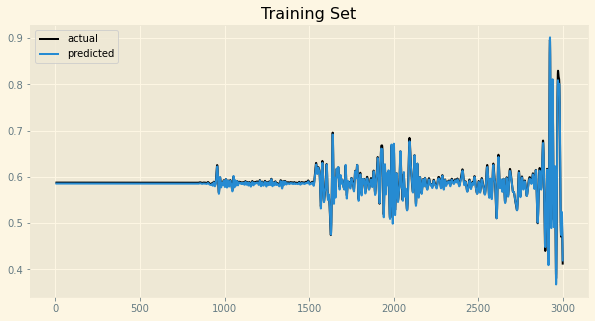

In [29]:
plt.figure(figsize=(10,5))
plt.plot(y_train,'k',label='actual')
plt.plot(train,label='predicted')
plt.title('Training Set')
plt.legend()

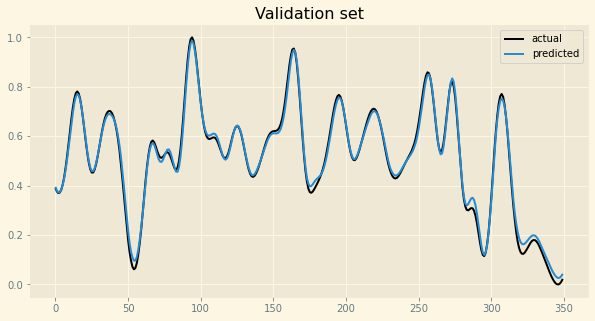

In [30]:
plt.figure(figsize=(10,5))
plt.plot(y_val,'k',label='actual')
plt.plot(val,label='predicted')
plt.title('Validation set')
plt.legend()

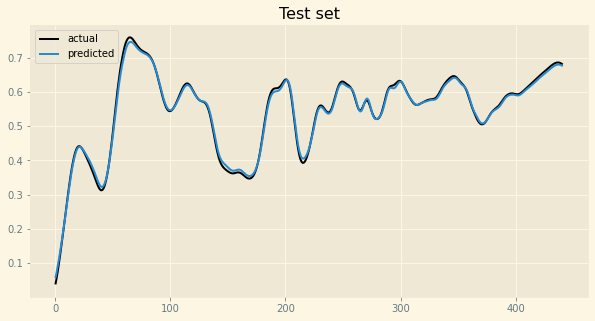

In [31]:
plt.figure(figsize=(10,5))
plt.plot(y_test,'k',label='actual')
plt.plot(test,label='predicted')
plt.title('Test set')
plt.legend()

## Multivariate
Predict all velocity components and pressure from their time series.

In [32]:
def df_to_xn_y(df,window_size=10):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        inpt = [var for var in df_as_np[i:i+window_size]]
        X.append(inpt)
        outpt = [df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2], df_as_np[i+window_size][3]]
        y.append(outpt)
    return np.array(X),np.array(y)

In [33]:
tdf=df[['u','v','w','p']]
tdf.u=(tdf.u-tdf.u.min())/(tdf.u.max()-tdf.u.min())
tdf.v=(tdf.v-tdf.v.min())/(tdf.v.max()-tdf.v.min())
tdf.w=(tdf.w-tdf.w.min())/(tdf.w.max()-tdf.w.min())
tdf.p=(tdf.p-tdf.p.min())/(tdf.p.max()-tdf.p.min())
var_in, var_out = df_to_xn_y(tdf)
var_in.shape, var_out.shape

((3792, 10, 4), (3792, 4))

In [34]:
np.max(var_out),np.min(var_out)

(1.0, 0.0)

In [35]:
in_train,out_train = var_in[:3000], var_out[:3000]
in_val,out_val = var_in[3000:3350], var_out[3000:3350]
in_test,out_test = var_in[3350:], var_out[3350:]
in_train.shape,out_train.shape

((3000, 10, 4), (3000, 4))

In [36]:
mvmodel = Sequential()
mvmodel.add(InputLayer((ws,4)))
mvmodel.add(LSTM(64))
mvmodel.add(Dense(16,'relu'))
mvmodel.add(Dense(4,'linear'))

mvmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17664     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 18,772
Trainable params: 18,772
Non-trainable params: 0
_________________________________________________________________


In [37]:
cpmv = ModelCheckpoint('model2/',save_best_only=True)
mvmodel.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [38]:
mvmodel.fit(in_train, out_train, validation_data=(in_val, out_val), epochs=50, callbacks=[cpmv])

Epoch 1/50
82/94 [=========================>....] - ETA: 0s - loss: 0.3911 - root_mean_squared_error: 0.6254

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 5s 40ms/step - loss: 0.3640 - root_mean_squared_error: 0.6033 - val_loss: 0.0849 - val_root_mean_squared_error: 0.2914
Epoch 2/50
80/94 [========================>.....] - ETA: 0s - loss: 0.0427 - root_mean_squared_error: 0.2067

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 0.0368 - root_mean_squared_error: 0.1917 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1321
Epoch 3/50
93/94 [============================>.] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0471

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 39ms/step - loss: 0.0022 - root_mean_squared_error: 0.0470 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1289
Epoch 4/50
85/94 [==========================>...] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0458

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1247
Epoch 5/50
91/94 [============================>.] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0437

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 37ms/step - loss: 0.0019 - root_mean_squared_error: 0.0436 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1205
Epoch 6/50
88/94 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0413

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 0.0017 - root_mean_squared_error: 0.0418 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1167
Epoch 7/50
84/94 [=========================>....] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0407

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 40ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1127
Epoch 8/50
84/94 [=========================>....] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0383

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 0.0014 - root_mean_squared_error: 0.0376 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1075
Epoch 9/50
94/94 [==============================] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0353

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 41ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1044
Epoch 10/50
84/94 [=========================>....] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0323

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1017
Epoch 11/50
90/94 [===========================>..] - ETA: 0s - loss: 9.9006e-04 - root_mean_squared_error: 0.0315

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 30ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 12/50
88/94 [===========================>..] - ETA: 0s - loss: 9.5966e-04 - root_mean_squared_error: 0.0310

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 9.3535e-04 - root_mean_squared_error: 0.0306 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0986
Epoch 13/50
80/94 [========================>.....] - ETA: 0s - loss: 8.7329e-04 - root_mean_squared_error: 0.0296

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 30ms/step - loss: 8.7273e-04 - root_mean_squared_error: 0.0295 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 14/50
93/94 [============================>.] - ETA: 0s - loss: 7.9283e-04 - root_mean_squared_error: 0.0282

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 8.1880e-04 - root_mean_squared_error: 0.0286 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0967
Epoch 15/50
91/94 [============================>.] - ETA: 0s - loss: 7.7518e-04 - root_mean_squared_error: 0.0278

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 37ms/step - loss: 7.7409e-04 - root_mean_squared_error: 0.0278 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0960
Epoch 16/50
89/94 [===========================>..] - ETA: 0s - loss: 7.5204e-04 - root_mean_squared_error: 0.0274

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 41ms/step - loss: 7.3218e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0951
Epoch 17/50
87/94 [==========================>...] - ETA: 0s - loss: 7.1432e-04 - root_mean_squared_error: 0.0267

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 41ms/step - loss: 6.9626e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0947
Epoch 18/50
89/94 [===========================>..] - ETA: 0s - loss: 6.7748e-04 - root_mean_squared_error: 0.0260

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 6.5931e-04 - root_mean_squared_error: 0.0257 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0939
Epoch 19/50
92/94 [============================>.] - ETA: 0s - loss: 6.2877e-04 - root_mean_squared_error: 0.0251

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 39ms/step - loss: 6.2564e-04 - root_mean_squared_error: 0.0250 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0927
Epoch 20/50
90/94 [===========================>..] - ETA: 0s - loss: 5.8949e-04 - root_mean_squared_error: 0.0243

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 5.9736e-04 - root_mean_squared_error: 0.0244 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0917
Epoch 21/50
91/94 [============================>.] - ETA: 0s - loss: 5.8395e-04 - root_mean_squared_error: 0.0242

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 37ms/step - loss: 5.7361e-04 - root_mean_squared_error: 0.0240 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0910
Epoch 22/50
86/94 [==========================>...] - ETA: 0s - loss: 5.6827e-04 - root_mean_squared_error: 0.0238

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 5.5082e-04 - root_mean_squared_error: 0.0235 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0903
Epoch 23/50
88/94 [===========================>..] - ETA: 0s - loss: 5.2621e-04 - root_mean_squared_error: 0.0229

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 37ms/step - loss: 5.3510e-04 - root_mean_squared_error: 0.0231 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0892
Epoch 24/50
90/94 [===========================>..] - ETA: 0s - loss: 5.2022e-04 - root_mean_squared_error: 0.0228

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 5.1645e-04 - root_mean_squared_error: 0.0227 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888
Epoch 25/50
90/94 [===========================>..] - ETA: 0s - loss: 5.1119e-04 - root_mean_squared_error: 0.0226

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 30ms/step - loss: 5.0415e-04 - root_mean_squared_error: 0.0225 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0883
Epoch 26/50
90/94 [===========================>..] - ETA: 0s - loss: 5.0667e-04 - root_mean_squared_error: 0.0225

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 4.9636e-04 - root_mean_squared_error: 0.0223 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0875
Epoch 27/50
90/94 [===========================>..] - ETA: 0s - loss: 4.9053e-04 - root_mean_squared_error: 0.0221

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 30ms/step - loss: 4.8696e-04 - root_mean_squared_error: 0.0221 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0871
Epoch 28/50
89/94 [===========================>..] - ETA: 0s - loss: 4.4772e-04 - root_mean_squared_error: 0.0212

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 4.7839e-04 - root_mean_squared_error: 0.0219 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 29/50
90/94 [===========================>..] - ETA: 0s - loss: 4.5853e-04 - root_mean_squared_error: 0.0214

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 30ms/step - loss: 4.7378e-04 - root_mean_squared_error: 0.0218 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 30/50
89/94 [===========================>..] - ETA: 0s - loss: 4.7837e-04 - root_mean_squared_error: 0.0219

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 4.6926e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0861
Epoch 31/50
82/94 [=========================>....] - ETA: 0s - loss: 4.7328e-04 - root_mean_squared_error: 0.0218

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 4.5969e-04 - root_mean_squared_error: 0.0214 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0857
Epoch 32/50
88/94 [===========================>..] - ETA: 0s - loss: 4.6253e-04 - root_mean_squared_error: 0.0215

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 30ms/step - loss: 4.5496e-04 - root_mean_squared_error: 0.0213 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 33/50
90/94 [===========================>..] - ETA: 0s - loss: 4.5776e-04 - root_mean_squared_error: 0.0214

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 4.5103e-04 - root_mean_squared_error: 0.0212 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0852
Epoch 34/50
85/94 [==========================>...] - ETA: 0s - loss: 4.3516e-04 - root_mean_squared_error: 0.0209

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 32ms/step - loss: 4.4349e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0848
Epoch 35/50
93/94 [============================>.] - ETA: 0s - loss: 4.4110e-04 - root_mean_squared_error: 0.0210

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 40ms/step - loss: 4.3962e-04 - root_mean_squared_error: 0.0210 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0847
Epoch 36/50
87/94 [==========================>...] - ETA: 0s - loss: 4.1623e-04 - root_mean_squared_error: 0.0204

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.3611e-04 - root_mean_squared_error: 0.0209 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 37/50
94/94 [==============================] - ETA: 0s - loss: 4.3383e-04 - root_mean_squared_error: 0.0208

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 4.3383e-04 - root_mean_squared_error: 0.0208 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0840
Epoch 38/50
88/94 [===========================>..] - ETA: 0s - loss: 4.4214e-04 - root_mean_squared_error: 0.0210

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 4.2916e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0836
Epoch 39/50
94/94 [==============================] - 0s 4ms/step - loss: 4.2391e-04 - root_mean_squared_error: 0.0206 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838
Epoch 40/50
90/94 [===========================>..] - ETA: 0s - loss: 4.1888e-04 - root_mean_squared_error: 0.0205

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 4.1809e-04 - root_mean_squared_error: 0.0204 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0835
Epoch 41/50
91/94 [============================>.] - ETA: 0s - loss: 4.1625e-04 - root_mean_squared_error: 0.0204

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 34ms/step - loss: 4.1298e-04 - root_mean_squared_error: 0.0203 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830
Epoch 42/50
89/94 [===========================>..] - ETA: 0s - loss: 4.1811e-04 - root_mean_squared_error: 0.0204

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 4.1150e-04 - root_mean_squared_error: 0.0203 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0829
Epoch 43/50
90/94 [===========================>..] - ETA: 0s - loss: 3.8284e-04 - root_mean_squared_error: 0.0196

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 4s 38ms/step - loss: 4.0450e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825
Epoch 44/50
85/94 [==========================>...] - ETA: 0s - loss: 4.0960e-04 - root_mean_squared_error: 0.0202

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 33ms/step - loss: 4.0214e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0820
Epoch 45/50
85/94 [==========================>...] - ETA: 0s - loss: 3.7518e-04 - root_mean_squared_error: 0.0194

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 37ms/step - loss: 3.9230e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0813
Epoch 46/50
85/94 [==========================>...] - ETA: 0s - loss: 3.9075e-04 - root_mean_squared_error: 0.0198

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 31ms/step - loss: 3.9217e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0808
Epoch 47/50
94/94 [==============================] - 0s 4ms/step - loss: 3.8618e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0809
Epoch 48/50
89/94 [===========================>..] - ETA: 0s - loss: 3.9403e-04 - root_mean_squared_error: 0.0199

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 3.8339e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0803
Epoch 49/50
83/94 [=========================>....] - ETA: 0s - loss: 2.9732e-04 - root_mean_squared_error: 0.0172

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 36ms/step - loss: 3.7540e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0802
Epoch 50/50
85/94 [==========================>...] - ETA: 0s - loss: 3.6332e-04 - root_mean_squared_error: 0.0191

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


94/94 [==============================] - 3s 35ms/step - loss: 3.7283e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0793


In [39]:
mv_model = load_model('model2/')

In [40]:
from sklearn.metrics import mean_squared_error
def plot_predictions(model,x,y,set_label,sublabels):
    predictions = model.predict(x)
    rms=np.sqrt(mean_squared_error(y,predictions,multioutput='raw_values'))
    nsteps=y.shape[0]
    nvars=y.shape[1]
    ncols=1+(nvars>1)
    nrows=1+int((nvars-1)/2)
    
    fig,axs = plt.subplots(nrows,ncols,figsize=(ncols*8,nrows*5))
    
    if nrows<=1:
        for var in range(nvars):
            axs[var].plot(y[:,var],'k',label='actual')
            axs[var].plot(predictions[:,var],'r',label='predicted')
            axs[var].set_title(sublabels[var])
            axs[var].legend()
            print("RMS error in %s prediction for %s : %4.3f" %(sublabels[var],set_label,rms[var]))
    
    else:
        var = 0
        for row in range(nrows):
            for col in range(ncols):
                axs[row][col].plot(y[:,var],'k',label='actual')
                axs[row][col].plot(predictions[:,var],'r',label='predicted')
                axs[row][col].set_title(sublabels[var])
                axs[row][col].legend()
                print("RMS error in %s prediction for %s : %4.3f" %(sublabels[var],set_label,rms[var]))
                var+=1
    
    plt.suptitle(set_label)

RMS error in u prediction for Training set : 0.009
RMS error in v prediction for Training set : 0.027
RMS error in w prediction for Training set : 0.012
RMS error in p prediction for Training set : 0.023


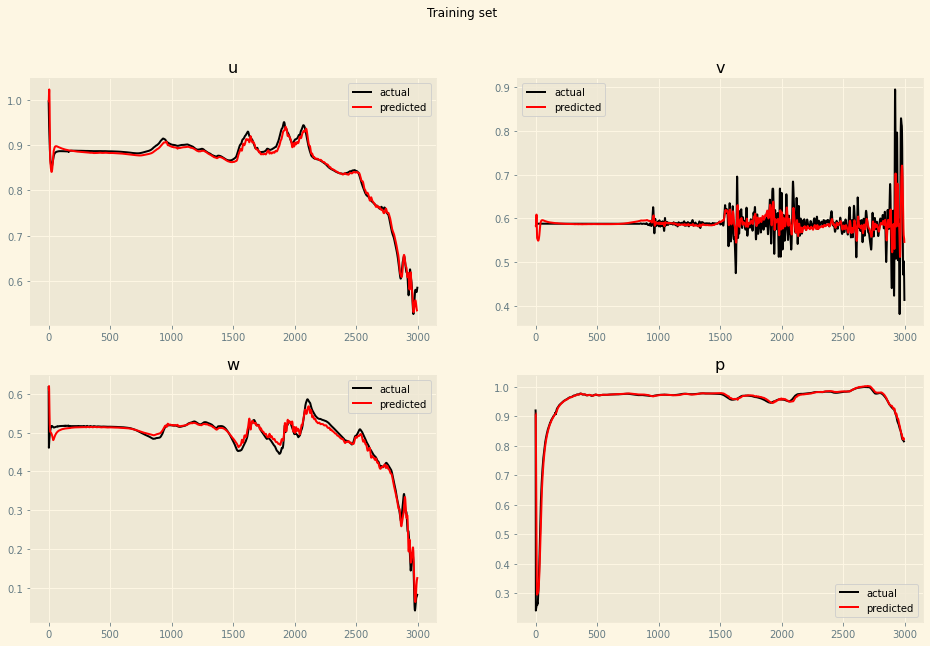

In [41]:
plot_predictions(mv_model,in_train,out_train,'Training set',['u','v','w','p'])

RMS error in u prediction for Validation set : 0.044
RMS error in v prediction for Validation set : 0.138
RMS error in w prediction for Validation set : 0.061
RMS error in p prediction for Validation set : 0.017


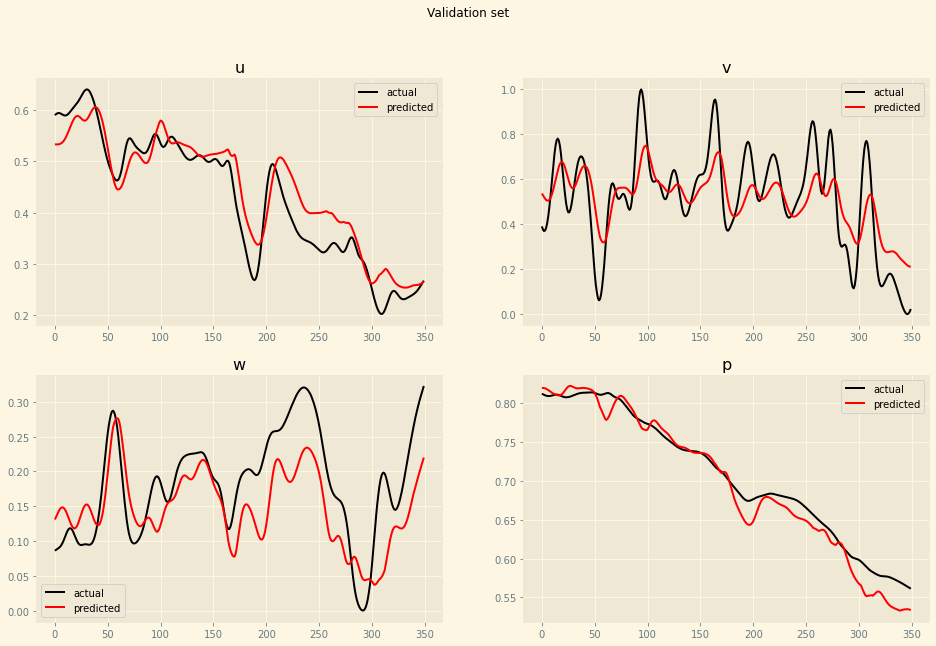

In [42]:
plot_predictions(mv_model,in_val,out_val,'Validation set',['u','v','w','p'])

RMS error in u prediction for Test set : 0.191
RMS error in v prediction for Test set : 0.237
RMS error in w prediction for Test set : 0.320
RMS error in p prediction for Test set : 0.033


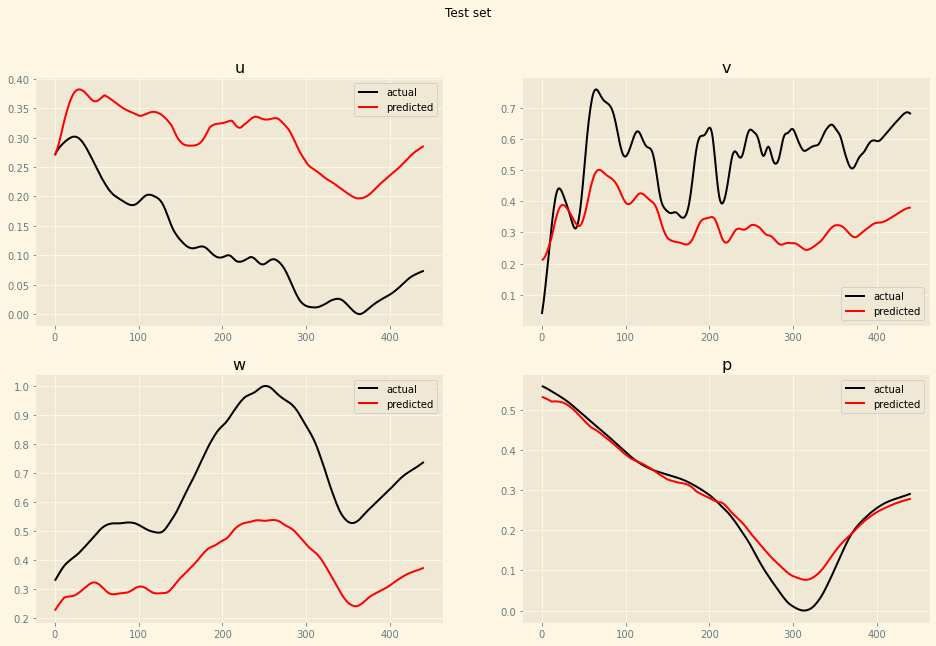

In [43]:
plot_predictions(mv_model,in_test,out_test,'Test set',['u','v','w','p'])

# Recursive prediction

In [44]:
df.columns

Index(['t', 'x', 'y', 'z', 'prank', 'etype', 'uidx', 'eidx', 'rho', 'u', 'v',
       'w', 'p', 'V_scaled'],
      dtype='object')

In [158]:
rp_model = load_model('model1/')
test_data = df.iloc[3350+ws-1:,13].to_numpy()

In [46]:
from copy import deepcopy

In [159]:
predictions = []
inpt_series = deepcopy(u_val[-1])
for i in range(len(test_data)):
    inpt_series = np.reshape(inpt_series,(1,10,1))
    pred = rp_model.predict(inpt_series).flatten()
    #print(pred)
    predictions.append(pred)
    inpt_series = np.append(inpt_series.flatten()[1:],pred)

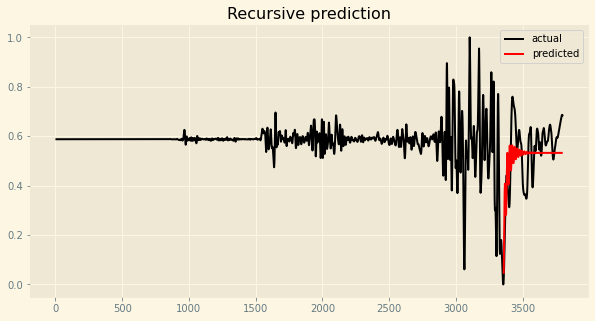

In [160]:
start_idx = 3350+ws-1
stop_idx = start_idx+len(test_data)
plt.figure(figsize=(10,5))
plt.plot(df['V_scaled'],'k',label='actual')
plt.plot(np.arange(start_idx,stop_idx),predictions,'r',label='predicted')
plt.title('Recursive prediction')
plt.legend()

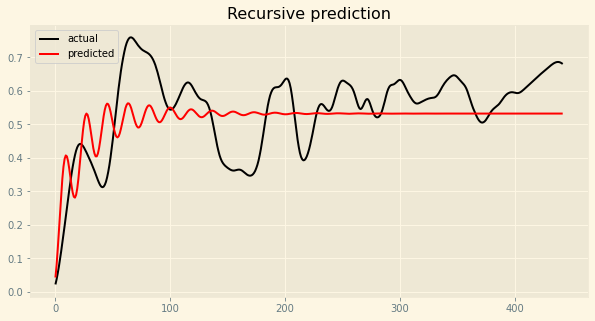

In [161]:
plt.figure(figsize=(10,5))
plt.plot(test_data,'k',label='actual')
plt.plot(predictions,'r',label='predicted')
plt.title('Recursive prediction')
plt.legend()

# Multistep predictions

In [93]:
def df_to_x_y_multi(df,window_size=10,steps=5):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(0,len(df_as_np)-window_size-steps,steps):
        inpt = [[u] for u in df_as_np[i:i+window_size]]
        X.append(inpt)
        outpt = df_as_np[i+window_size:i+window_size+steps]
        y.append(outpt)
    return np.array(X),np.array(y)

In [94]:
ms_inU,ms_outU = df_to_x_y_multi(df['V_scaled'],10,5)
ms_inU.shape, ms_outU.shape

((370, 100, 1), (370, 10))

In [80]:
msin_train,msout_train = ms_inU[:600], ms_outU[:600]
msin_val,msout_val = ms_inU[600:670], ms_outU[600:670]
msin_test,msout_test = ms_inU[670:], ms_outU[670:]
msin_train.shape,msout_train.shape

((600, 10, 1), (600, 5))

In [81]:
msmodel = Sequential()
msmodel.add(InputLayer((10,1)))
msmodel.add(LSTM(64))
msmodel.add(Dense(20,'relu'))
msmodel.add(Dense(5,'linear'))

msmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 20)                1300      
                                                                 
 dense_5 (Dense)             (None, 5)                 105       
                                                                 
Total params: 18,301
Trainable params: 18,301
Non-trainable params: 0
_________________________________________________________________


In [82]:
cpms = ModelCheckpoint('model3/',save_best_only=True)
msmodel.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [91]:
msmodel.fit(msin_train, msout_train, validation_data=(msin_val, msout_val), epochs=10, callbacks=[cpms])

Epoch 1/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1915
Epoch 2/10
10/19 [==============>...............] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0377    

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


19/19 [==============================] - 3s 144ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1913
Epoch 3/10
13/19 [===================>..........] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0342    

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


19/19 [==============================] - 3s 144ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1912
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1915
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1913
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1912
Epoch 7/10
15/19 [======================>.......] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0364    

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


19/19 [==============================] - 3s 183ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1905
Epoch 8/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0365 - val_root_mean_squared_error: 0.1910
Epoch 9/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1909
Epoch 10/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1905


In [84]:
ms_model = load_model('model3/')
train=ms_model.predict(msin_train)
val=ms_model.predict(msin_val)
test=ms_model.predict(msin_test)

In [85]:
train.shape, val.shape, test.shape

((600, 5), (70, 5), (88, 5))

In [86]:
msout_train.shape, msout_val.shape, msout_test.shape

((600, 5), (70, 5), (88, 5))

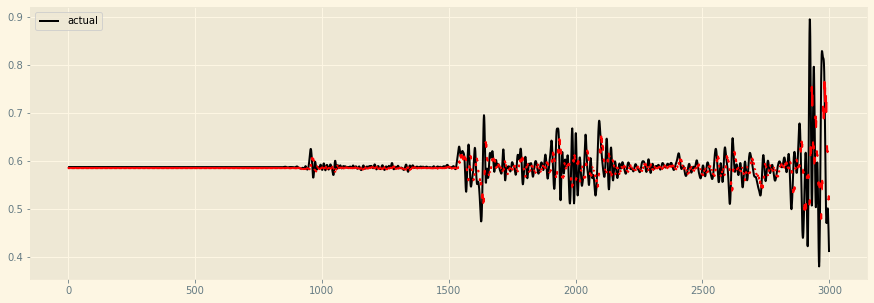

In [87]:
plt.figure(figsize=(15,5))
plt.plot(msout_train.flatten(),'k',label='actual')
for i in range(train.shape[0]):
    plt.plot(np.arange(i*5,(i+1)*5),train[i,:],'r')
plt.legend()

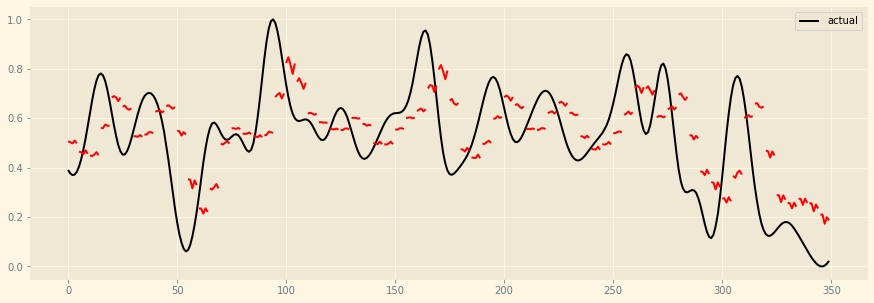

In [88]:
plt.figure(figsize=(15,5))
plt.plot(msout_val.flatten(),'k',label='actual')
for i in range(val.shape[0]):
    plt.plot(np.arange(i*5,(i+1)*5),val[i,:],'r')
plt.legend()

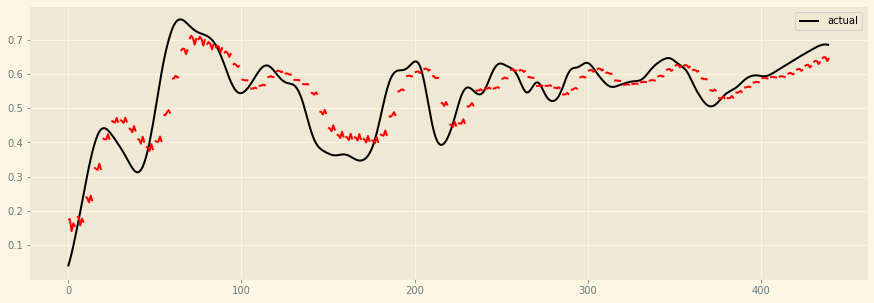

In [92]:
plt.figure(figsize=(15,5))
plt.plot(msout_test.flatten(),'k',label='actual')
for i in range(test.shape[0]):
    plt.plot(np.arange(i*5,(i+1)*5),test[i,:],'r')
    tavg=np.mean(test[i,:])
    #plt.plot(i*5+2,tavg,'g',marker='o',alpha=0.5)
plt.legend()

### Multistep recursive prediction

In [162]:
msrp = load_model('model3/')
msrp_data = df.iloc[669*5+ws:,13].to_numpy()

In [165]:
ms_predictions = np.array([])
inpt_series = deepcopy(msin_val[-1])
for i in range(0,len(test_data),5):
    inpt_series = np.reshape(inpt_series,(1,10,1))
    pred = msrp.predict(inpt_series).flatten()
    #print(pred)
    ms_predictions=np.append(ms_predictions,pred)
    inpt_series = np.append(inpt_series.flatten()[5:],pred)

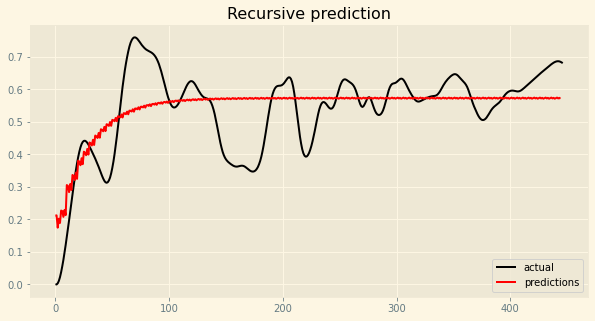

In [169]:
plt.figure(figsize=(10,5))
plt.plot(msrp_data,'k',label='actual')
plt.plot(ms_predictions,'r',label='predictions')
plt.title('Recursive prediction')
#plt.xlim(right=3400)
plt.legend()

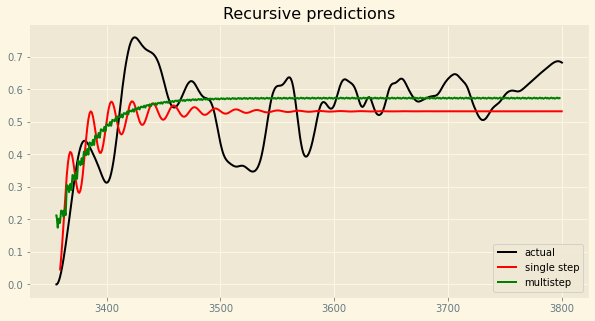

In [173]:
start_idx = 3350+ws-1
stop_idx = start_idx+len(test_data)
plt.figure(figsize=(10,5))
plt.plot(df.iloc[669*5+ws:,13],'k',label='actual')
plt.plot(np.arange(3350+ws-1,3350+ws-1+len(test_data)),predictions,'r',label='single step')
plt.plot(np.arange(669*5+ws,669*5+ws+len(msrp_data)-2),ms_predictions,'g',label='multistep')
plt.title('Recursive predictions')
plt.legend()

ARUN SOMAN PILLAI
ARUN SOMAN VELLANATTU